In [1]:
import uproot
import numpy as np
import pandas as pd
import torch 
import matplotlib.pyplot as plt
from torch import nn, optim
import ROOT

Welcome to JupyROOT 6.18/04


In [2]:
bkg_events     = uproot.open('ttbar.root')['Delphes_Ntuples']

SM_muon_pt     = bkg_events['muon_pt'].array()
SM_muon_eta    = bkg_events['muon_eta'].array()
SM_muon_phi    = bkg_events['muon_phi'].array()
SM_muon_mass   = bkg_events['muon_mass'].array()
SM_muon_charge = bkg_events['muon_charge'].array()

SM_elec_pt     = bkg_events['elec_pt'].array()
SM_elec_eta    = bkg_events['elec_eta'].array()
SM_elec_phi    = bkg_events['elec_phi'].array()
SM_elec_mass   = bkg_events['elec_mass'].array()
SM_elec_charge = bkg_events['elec_charge'].array()

In [3]:
sig_events       = uproot.open('Mstop_175_mchi_7_5.root')['Delphes_Ntuples']

SUSY_muon_pt     = sig_events['muon_pt'].array()
SUSY_muon_eta    = sig_events['muon_eta'].array()
SUSY_muon_phi    = sig_events['muon_phi'].array()
SUSY_muon_mass   = sig_events['muon_mass'].array()
SUSY_muon_charge = sig_events['muon_charge'].array()

SUSY_elec_pt     = sig_events['elec_pt'].array()
SUSY_elec_eta    = sig_events['elec_eta'].array()
SUSY_elec_phi    = sig_events['elec_phi'].array()
SUSY_elec_mass   = sig_events['elec_mass'].array()
SUSY_elec_charge = sig_events['elec_charge'].array()

In [4]:
## SM arrays for the dataframe
n_events = len(SM_elec_eta)

SM_eptcut    = SM_elec_pt > 30
SM_muptcut   = SM_muon_pt > 30

SM_elptreduced  = SM_elec_pt[SM_eptcut]
SM_muptreduced  = SM_muon_pt[SM_muptcut]

SM_eletareduced = SM_elec_eta[SM_eptcut]
SM_muetareduced = SM_muon_eta[SM_muptcut]

SM_elphireduced = SM_elec_phi[SM_eptcut]
SM_muphireduced = SM_muon_phi[SM_muptcut]

SM_elmassreduced = SM_elec_mass[SM_eptcut]
SM_mumassreduced = SM_muon_mass[SM_muptcut]

SM_mu_pt_array     = np.array([])
SM_el_pt_array     = np.array([])

SM_delta_eta_array = np.array([])
SM_delta_phi_array = np.array([])

SM_el_phi_array     = np.array([])
SM_mu_phi_array     = np.array([])

SM_el_eta_array     = np.array([])
SM_mu_eta_array     = np.array([])

for i in range(n_events) :
    if (len(SM_eletareduced[i]) == 1 and len(SM_muetareduced[i]) == 1) :
        
        e4vec              = ROOT.TLorentzVector()
        e4vec.SetPtEtaPhiM(SM_elptreduced[i], SM_eletareduced[i], SM_elphireduced[i], SM_elmassreduced [i])

        mu4vec             = ROOT.TLorentzVector()
        mu4vec.SetPtEtaPhiM(SM_muptreduced[i], SM_muetareduced[i], SM_muphireduced[i], SM_mumassreduced[i])
        
        SM_delta_eta       = abs(SM_eletareduced[i] - SM_muetareduced[i])
        SM_delta_phi       = abs(e4vec.DeltaPhi(mu4vec))
        
        SM_el_pt_array     = np.append(SM_el_pt_array, SM_elptreduced[i])
        SM_mu_pt_array     = np.append(SM_mu_pt_array, SM_muptreduced[i])  

        SM_el_phi_array    = np.append(SM_el_phi_array, SM_elphireduced[i])
        SM_mu_phi_array    = np.append(SM_mu_phi_array, SM_muphireduced[i])
        
        SM_el_eta_array    = np.append(SM_el_eta_array, SM_eletareduced[i])
        SM_mu_eta_array    = np.append(SM_mu_eta_array, SM_muetareduced[i]) 
        
        SM_delta_eta_array = np.append(SM_delta_eta_array, SM_delta_eta)
        SM_delta_phi_array = np.append(SM_delta_phi_array, SM_delta_phi)   

print('Processed :: %i events of which :: %i passed ' %(n_events, len(SM_mu_eta_array)))

Processed :: 250000 events of which :: 23638 passed 


In [6]:
n_events = len(SUSY_elec_eta)

SUSY_eptcut  = SUSY_elec_pt > 30
SUSY_muptcut = SUSY_muon_pt > 30

SUSY_elptreduced  = SUSY_elec_pt[SUSY_eptcut]
SUSY_muptreduced  = SUSY_muon_pt[SUSY_muptcut]

SUSY_eletareduced = SUSY_elec_eta[SUSY_eptcut]
SUSY_muetareduced = SUSY_muon_eta[SUSY_muptcut]

SUSY_elphireduced = SUSY_elec_phi[SUSY_eptcut]
SUSY_muphireduced = SUSY_muon_phi[SUSY_muptcut]

SUSY_elmassreduced = SUSY_elec_mass[SUSY_eptcut]
SUSY_mumassreduced = SUSY_muon_mass[SUSY_muptcut]

SUSY_mu_pt_array     = np.array([])
SUSY_el_pt_array     = np.array([])

SUSY_delta_eta_array = np.array([])
SUSY_delta_phi_array = np.array([])

SUSY_el_phi_array     = np.array([])
SUSY_mu_phi_array     = np.array([])

SUSY_el_eta_array     = np.array([])
SUSY_mu_eta_array     = np.array([])

for i in range(n_events) :
    if (len(SUSY_eletareduced[i]) == 1 and len(SUSY_muetareduced[i]) == 1) : 
        SUSY_e4vec           = ROOT.TLorentzVector()
        SUSY_e4vec.SetPtEtaPhiM(SUSY_elptreduced[i], SUSY_eletareduced[i], SUSY_elphireduced[i],SUSY_elmassreduced[i])

        SUSY_mu4vec          = ROOT.TLorentzVector()
        SUSY_mu4vec.SetPtEtaPhiM(SUSY_muptreduced[i], SUSY_muetareduced[i], SUSY_muphireduced[i],SUSY_elmassreduced[i])
        
        SUSY_delta_eta       = abs(SUSY_eletareduced[i] - SUSY_muetareduced[i])
        SUSY_delta_phi       = abs(SUSY_e4vec.DeltaPhi(SUSY_mu4vec))
        
        SUSY_el_pt_array     = np.append(SUSY_el_pt_array, SUSY_elptreduced[i])
        SUSY_mu_pt_array     = np.append(SUSY_mu_pt_array, SUSY_muptreduced[i])     

        SUSY_el_phi_array    = np.append(SUSY_el_phi_array, SUSY_elphireduced[i])
        SUSY_mu_phi_array    = np.append(SUSY_mu_phi_array, SUSY_muphireduced[i])
        
        SUSY_el_eta_array    = np.append(SUSY_el_eta_array, SUSY_eletareduced[i])
        SUSY_mu_eta_array    = np.append(SUSY_mu_eta_array, SUSY_muetareduced[i]) 
        
        SUSY_delta_eta_array = np.append(SUSY_delta_eta_array, SUSY_delta_eta)
        SUSY_delta_phi_array = np.append(SUSY_delta_phi_array, SUSY_delta_phi)  

print('Processed :: %i events of which :: %i passed ' %(n_events, len(SUSY_mu_eta_array)))

Processed :: 235859 events of which :: 20624 passed 


In [7]:
SM_arr   = [ SM_el_pt_array, SM_mu_pt_array, SM_el_eta_array, SM_mu_eta_array, SM_delta_eta_array,   SM_delta_phi_array ]
SUSY_arr = [ SUSY_el_pt_array,   SUSY_mu_pt_array, SUSY_el_eta_array, SUSY_mu_eta_array, SUSY_delta_eta_array, SUSY_delta_phi_array ]

bkg_df   = pd.DataFrame(data = SM_arr).T
sig_df   = pd.DataFrame(data =SUSY_arr).T   

bkg_df.columns = ['Leading elec pt', 'Leading muon pt','Leading elec eta', 'Leading muon eta', 'Abs Delta Eta', 'Abs Delta Phi']
sig_df.columns = ['Leading elec pt', 'Leading muon pt', 'Leading elec eta', 'Leading muon eta','Abs Delta Eta', 'Abs Delta Phi']

In [8]:
len(bkg_df)

23638

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


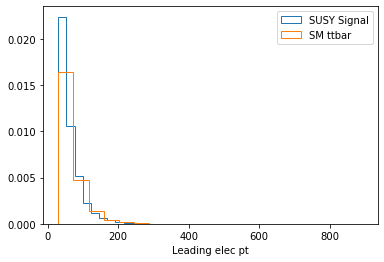

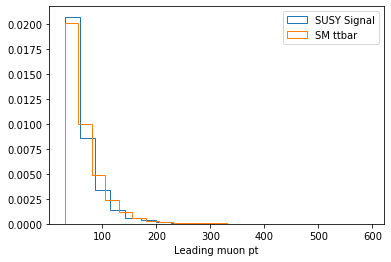

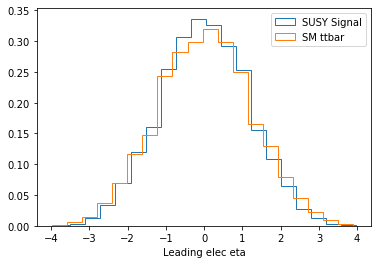

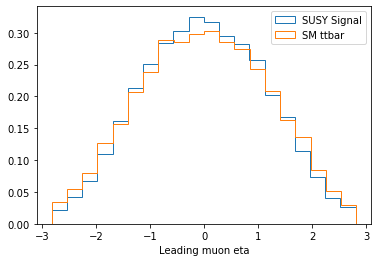

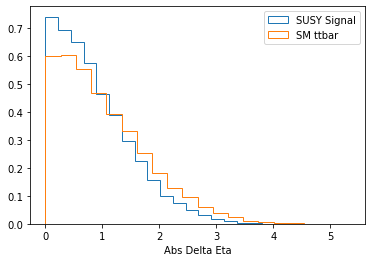

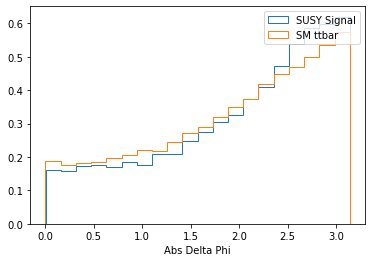

In [9]:
HLFs = ['Leading elec pt', 'Leading muon pt', 'Leading elec eta', 'Leading muon eta','Abs Delta Eta', 'Abs Delta Phi']
for hlf in HLFs:
    plt.figure()
    plt.hist(sig_df[hlf], bins=20, normed=True, histtype='step', label='SUSY Signal')
    plt.hist(bkg_df[hlf], bins=20, normed=True, histtype='step', label='SM ttbar')
    plt.xlabel(hlf)
    plt.legend(loc='best')

In [10]:
# Set both to equal sizes 
# Reducing the bkg dataframe size

sig_df = sig_df[1:len(bkg_df)]

# Standardize
# It was originally just subtracting bkg mean from both,
# not sure how much sense that makes

sig_mean = sig_df.mean()
sig_std  = sig_df.std()

bkg_mean = bkg_df.mean()
bkg_std  = bkg_df.std()

sig_df = (sig_df - bkg_mean)/ sig_std
bkg_df = (bkg_df - bkg_mean)/ bkg_std

signal = sig_df.values
bkg    = bkg_df.values

sig_label = np.ones(len(signal))
bkg_label = np.zeros(len(bkg))

data      = np.concatenate((signal,bkg))
label     = np.concatenate((sig_label,bkg_label))

In [11]:
data.shape

(44261, 6)

In [12]:
len(label[label == 0])

23638

In [13]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True)
skf.get_n_splits(data, label)
skf.split(data, label)

<generator object _BaseKFold.split at 0x28cae7048>

In [14]:
for train_index, test_index in skf.split(data, label):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = data[train_index], data[test_index]
    y_train, y_test = label[train_index], label[test_index]

TRAIN: [    0     4     6 ... 44258 44259 44260] TEST: [    1     2     3 ... 44251 44253 44254]
TRAIN: [    1     2     3 ... 44251 44253 44254] TEST: [    0     4     6 ... 44258 44259 44260]


In [17]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [18]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from skopt import gp_minimize

model = Sequential()
opt = SGD(lr=1, decay=1e-6, momentum=0.05, nesterov=True)
model.add(Dense(10, input_dim = 6 ,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Using TensorFlow backend.
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/amandee

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [19]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [20]:
hist = model.fit(x_train, y_train, batch_size=150, nb_epoch=50,verbose=1, shuffle=True, validation_split=0.3,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
                  ModelCheckpoint(filepath='model.h5', verbose=0)])

Instructions for updating:
Use tf.cast instead.


/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 15491 samples, validate on 6640 samples
Epoch 1/50
15491/15491 [==============================] - 0s 24us/step - loss: 0.6872 - acc: 0.5506 - val_loss: 0.6901 - val_acc: 0.5675
Epoch 2/50
15491/15491 [==============================] - 0s 9us/step - loss: 0.6761 - acc: 0.5756 - val_loss: 0.6835 - val_acc: 0.5663
Epoch 3/50
15491/15491 [==============================] - 0s 9us/step - loss: 0.6740 - acc: 0.5769 - val_loss: 0.6731 - val_acc: 0.5878
Epoch 4/50
15491/15491 [==============================] - 0s 9us/step - loss: 0.6698 - acc: 0.5851 - val_loss: 0.6732 - val_acc: 0.5852
Epoch 5/50
15491/15491 [==============================] - 0s 9us/step - loss: 0.6673 - acc: 0.5842 - val_loss: 0.6663 - val_acc: 0.5858
Epoch 6/50
15491/15491 [==============================] - 0s 8us/step - loss: 0.6647 - acc: 0.5882 - val_loss: 0.6687 - val_acc: 0.5810
Epoch 7/50
15491/15491 [==============================] - 0s 9us/step - loss: 0.6623 - acc: 0.5907 - val_loss: 0.6728 - val_acc: 0.578

2020-02-20 14:34:07.710646: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


In [21]:
def show_losses( histories ):
    plt.figure(figsize=(10,10))
    #plt.ylim(bottom=0)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Error by Epoch')
    colors=[]
    do_acc=False
    for label,loss in histories:
        color = tuple(np.random.random(3))
        colors.append(color)
        l = label
        vl= label+" validation"
        if 'acc' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['acc'][-1])
            do_acc = True
        if 'val_acc' in loss.history:
            vl+=' (val acc %2.4f)'% (loss.history['val_acc'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color=color)
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color=color)


    plt.legend()
    plt.yscale('log')
    plt.show()
    if not do_acc: return
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    for i,(label,loss) in enumerate(histories):
        color = colors[i]
        if 'acc' in loss.history:
            plt.plot(loss.history['acc'], lw=2, label=label+" accuracy", color=color)
        if 'val_acc' in loss.history:
            plt.plot(loss.history['val_acc'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(loc='lower right')

    plt.show()

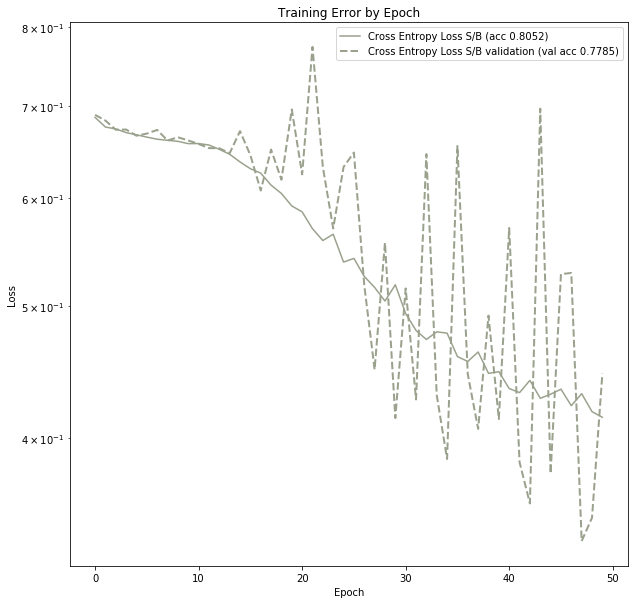

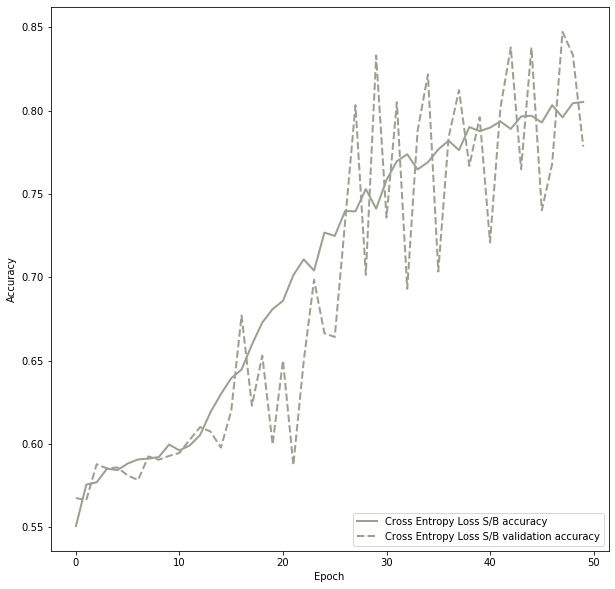

In [22]:
show_losses( [("Cross Entropy Loss S/B", hist)])

In [23]:
def accuracy( p ):
    p_cat = np.argmax(p,axis=1)
    print("Fraction of good prediction")
    print(len(np.where( p_cat == y_test)[0]))
    print(len(np.where( p_cat == y_test )[0])/float(len(p_cat)),"%")

In [24]:
pred = model.predict(x_test) 
pred

array([[0.4900801 ],
       [0.9961418 ],
       [0.9917595 ],
       ...,
       [0.28061548],
       [0.07788826],
       [0.07817835]], dtype=float32)

In [25]:
y_test

array([1., 1., 1., ..., 0., 0., 0.])

In [26]:
from sklearn.metrics import roc_curve
y_pred = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

In [27]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

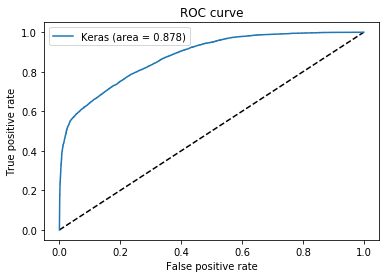

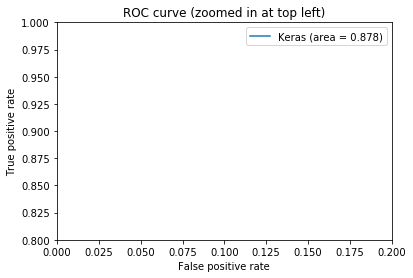

In [28]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


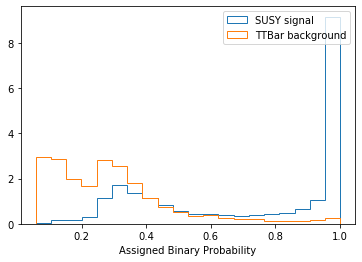

In [29]:
plt.figure()
plt.hist(pred[y_test == 1], bins=20, normed=True, histtype='step', label='SUSY signal')
plt.hist(pred[y_test == 0], bins=20, normed=True, histtype='step', label='TTBar background')
plt.xlabel('Assigned Binary Probability')
plt.legend(loc='best')

In [30]:
bool_arr = pred[y_test == 1] > 0.8
np.sum(bool_arr)

5557

In [31]:
bool_arr = pred[y_test == 0] > 0.8
np.sum(bool_arr)

383

In [32]:
len(pred[y_test == 1])

10311

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


1.0

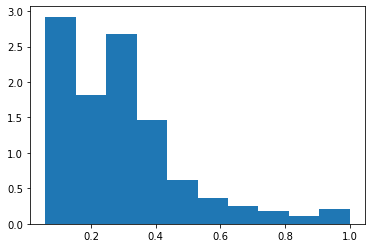

In [33]:
values, bins, _ = plt.hist(pred[y_test == 0], normed=True)
area = sum(np.diff(bins)*values)
area

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


1.0

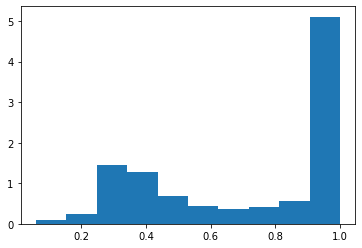

In [34]:
values, bins, _ = plt.hist(pred[y_test == 1], normed=True)
area = sum(np.diff(bins)*values)
area

In [35]:
scale_factor = 0.14
(counts, bins) = np.histogram(pred[y_test == 1], bins=20)

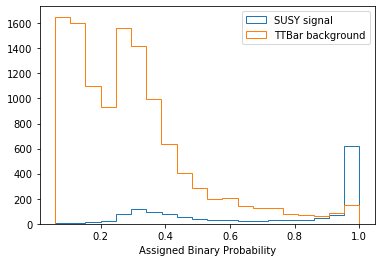

In [36]:
plt.figure()
SUSY_cts, SUSY_bins,_  = plt.hist(bins[:-1], bins, weights = scale_factor * counts, histtype='step', label='SUSY signal')
SM_cts, SM_bins,_      = plt.hist(pred[y_test == 0], bins=20, histtype='step', label='TTBar background')
plt.xlabel('Assigned Binary Probability')
plt.legend(loc='best')

In [36]:
bool_arr = pred[y_test == 0] > 0.8
np.sum(bool_arr)

245

In [37]:
bool_arr = pred[y_test == 1] > 0.8
np.sum(bool_arr)

5995

In [38]:
sum(SUSY_cts[16:20])

778.68

In [39]:
sum(SM_cts[16:20])

101.0

In [42]:
model

In [41]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model_mstop175.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_mstop175.h5")
print("Saved model to disk")

Saved model to disk


In [37]:
events     = uproot.open('emu_2016.root')['ttBar_treeVariables_step8']

# load branches relevant to the analysis

l_pt            = events['l_pt'].array()
l_eta           = events['l_eta'].array()
lbar_pt         = events['lbar_pt'].array()
lbar_eta        = events['lbar_eta'].array()
llbar_delta_phi = events['llbar_delta_phi'].array()
llbar_delta_eta = events['llbar_delta_eta'].array()

# convert to a dataframe
l_arr    = [ l_pt, lbar_pt, l_eta, lbar_eta, abs(llbar_delta_eta), llbar_delta_phi]
bkg_df   = pd.DataFrame(data = l_arr).T

In [38]:
bkg_df

,0,1,2,3,4,5
0,74.467216,50.973518,-0.418409,0.587055,1.005464,2.802483
1,27.841042,26.756859,2.015959,0.991299,1.024660,0.353197
2,33.562599,23.000994,0.469944,-0.486257,0.956200,2.680645
3,108.975418,90.221825,1.056395,-0.713909,1.770305,2.046340
4,53.236568,20.296711,-1.560789,-0.513840,1.046949,1.433123
...,...,...,...,...,...,...
135692,38.186626,52.054928,0.245965,-0.921310,1.167275,0.675114
135693,142.667358,93.270966,-0.215162,2.310761,2.525923,2.553042
135694,52.220943,80.904778,1.273188,0.574369,0.698818,2.616055
135695,25.912148,73.027985,0.676635,-1.382806,2.059440,1.839178


In [39]:
bkg_mean = bkg_df.mean()
bkg_std  = bkg_df.std()

# normalize dataframe
bkg_df   = (bkg_df - bkg_mean)/ bkg_std

In [40]:
bkg_df.columns = ['l pt', 'lbar pt','l eta', 'lbar eta', 'llbar Delta Eta', 'llbar Delta Phi']

In [41]:
bkg_df

,l pt,lbar pt,l eta,lbar eta,llbar Delta Eta,llbar Delta Phi
0,0.434275,-0.229873,-0.394593,0.541161,-0.112474,1.132268
1,-0.882741,-0.913013,1.884167,0.917388,-0.087623,-1.678226
2,-0.721128,-1.018963,0.436975,-0.457764,-0.176252,0.992463
3,1.409004,0.877300,0.985940,-0.669639,0.877700,0.264613
4,-0.165412,-1.095250,-1.463951,-0.483435,-0.058767,-0.439038
...,...,...,...,...,...,...
135692,-0.590517,-0.199367,0.227313,-0.862666,0.097009,-1.308835
135693,2.360676,0.963315,-0.204338,2.145404,1.855934,0.846041
135694,-0.194099,0.614472,1.188874,0.529354,-0.509462,0.918346
135695,-0.937225,0.392271,0.630454,-1.292177,1.252019,0.026900


In [42]:
predicted = model.predict(bkg_df)

In [43]:
predicted

array([[0.99577177],
       [0.9999999 ],
       [0.9999959 ],
       ...,
       [0.99999994],
       [1.        ],
       [0.99365073]], dtype=float32)

(array([  5323.,   3129.,   2669.,   1829.,   1792.,   1870.,   2289.,
          2942.,   4737., 109117.]),
 array([0.05813667, 0.15232301, 0.24650934, 0.34069568, 0.43488201,
        0.52906835, 0.62325466, 0.717441  , 0.8116273 , 0.9058137 ,
        1.        ], dtype=float32),
 <a list of 10 Patch objects>)

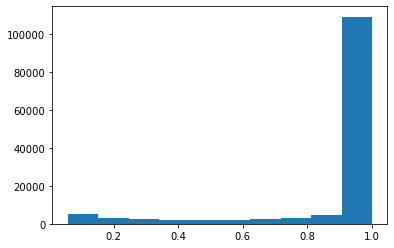

In [44]:
plt.hist(predicted)

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([5.43054079e-01, 1.98753231e-01, 5.01343321e-02, 1.39794203e-02,
        3.98727790e-03, 1.57455569e-03, 4.49017782e-04, 2.57436862e-04,
        8.38166526e-05, 6.58559413e-05, 3.59214225e-05, 0.00000000e+00,
        1.19738075e-05, 1.19738075e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.98690376e-06]),
 array([-1.10359286,  0.12732047,  1.35823381,  2.58914714,  3.82006048,
         5.05097382,  6.28188715,  7.51280049,  8.74371383,  9.97462716,
        11.2055405 , 12.43645383, 13.66736717, 14.89828051, 16.12919384,
        17.36010718, 18.59102052, 19.82193385, 21.05284719, 22.28376052,
        23.51467386]),
 <a list of 1 Patch objects>)

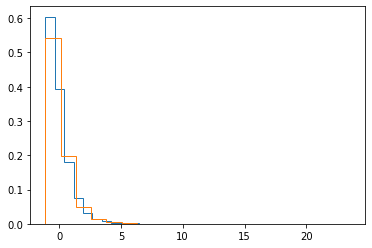

In [38]:
plt.hist(bkg_df['l pt'], bins=20, normed=True, histtype='step', label='SM ttbar')
plt.hist(bkg_df['lbar pt'], bins=20, normed=True, histtype='step', label='SM ttbar')

In [41]:
pred = model.predict(x_test)

(array([ 597., 2066., 2137., 3415., 3306., 1825.,  799.,  512.,  533.,
        6940.]),
 array([0.14526889, 0.230742  , 0.3162151 , 0.40168822, 0.48716134,
        0.57263446, 0.6581076 , 0.74358064, 0.82905376, 0.9145269 ,
        1.        ], dtype=float32),
 <a list of 10 Patch objects>)

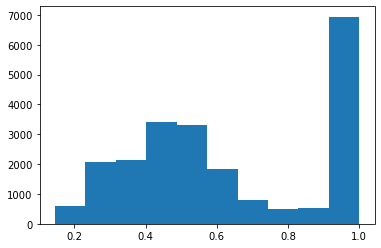

In [42]:
plt.hist(pred)